In [1]:
import pandas as pd
"""
This script performs sentiment analysis on restaurant reviews.

Modules:
    pandas: Provides data structures and data analysis tools.
    matplotlib.pyplot: Used for creating static, animated, and interactive visualizations.
    seaborn: A statistical data visualization library based on matplotlib.
    warnings: Provides a way to control warning messages.

Warnings:
    All warnings are ignored to ensure a clean output.
"""
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



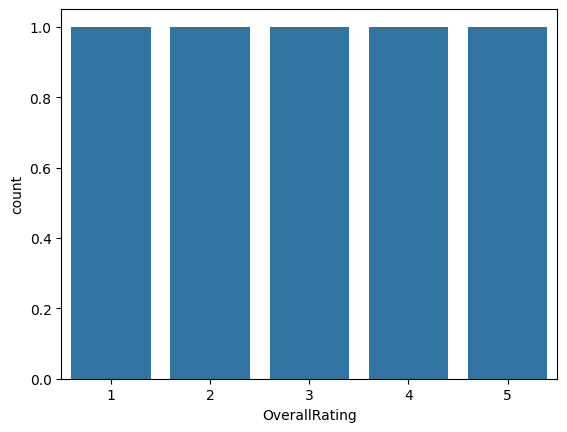

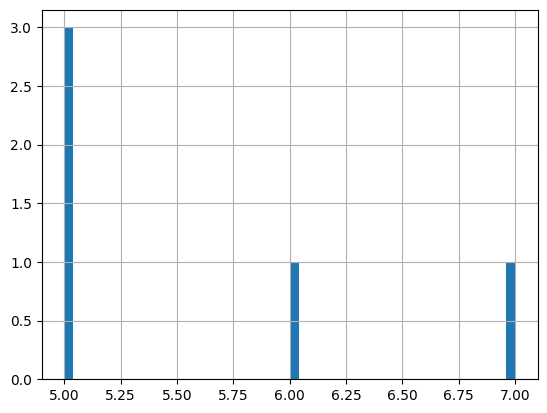

In [2]:
# Load data
"""
This script performs the following tasks:

1. Loads restaurant feedback data from a CSV file.
2. Explores numeric columns related to food quality, service, and cleanliness.
3. Plots the distribution of overall ratings.
4. Analyzes the length of comments by plotting a histogram of word counts.

Functions:
- Load data: Reads the 'restaurant_feedback.csv' file into a DataFrame.
- Explore numeric columns: Describes statistics for 'FoodQuality', 'Service', and 'Cleanliness' columns.
- Plot distribution: Creates a count plot for the 'OverallRating' column.
- Explore text data: Plots a histogram of word counts in the 'Comments' column.
"""
df = pd.read_csv('restaurant_feedback.csv')

# Explore numeric columns
numeric_cols = ['FoodQuality', 'Service', 'Cleanliness']
df[numeric_cols].describe()

# Plot distribution
sns.countplot(x='OverallRating', data=df)
plt.show()

# Explore text data
df['Comments'].apply(lambda x: len(str(x).split())).hist(bins=50)
plt.show()


In [3]:
# Impute numeric columns with median
"""
Impute missing values in the DataFrame.

This function performs the following imputations:
1. For numeric columns, it fills missing values with the median of the respective column.
2. For the 'Comments' text column, it fills missing values with the string 'No comment'.

Parameters:
    df (pd.DataFrame): The DataFrame containing the data to be imputed.
    numeric_cols (list of str): List of column names in the DataFrame that are numeric.

Returns:
    None: The DataFrame is modified in place.
"""
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute text column
df['Comments'].fillna('No comment', inplace=True)


In [4]:
from sklearn.preprocessing import StandardScaler
"""
This script standardizes numeric columns in a DataFrame using the StandardScaler from scikit-learn.

Imports:
    from sklearn.preprocessing import StandardScaler: Imports the StandardScaler class for standardizing features.

Variables:
    scaler: An instance of StandardScaler used to standardize the numeric columns.
    df[numeric_cols]: The DataFrame columns containing numeric data that will be standardized.

Operations:
    The numeric columns in the DataFrame are transformed to have a mean of 0 and a standard deviation of 1 using the fit_transform method of StandardScaler.
"""

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Preprocesses the input text by performing the following steps:
    1. Converts the text to lowercase.
    2. Removes punctuation and numbers.
    3. Tokenizes the text into words.
    4. Removes stopwords and lemmatizes the remaining words.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text as a single string.
    """
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['CleanedComments'] = df['Comments'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\v-artripathi\.conda\envs\genai\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\v-artripathi\.conda\envs\genai\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df['AverageRating'] = df[numeric_cols].mean(axis=1)
"""
Calculates the average rating for each row in the DataFrame.

This function computes the mean of the specified numeric columns for each row
and assigns the result to a new column named 'AverageRating'.

Attributes:
    df (pd.DataFrame): The DataFrame containing the data.
    numeric_cols (list): A list of column names that contain numeric values.

Returns:
    pd.DataFrame: The DataFrame with an additional column 'AverageRating' containing the mean of the specified numeric columns for each row.
"""
df


,FeedbackID,OverallRating,FoodQuality,Service,Cleanliness,Ambiance,ValueForMoney,Comments,Timestamp,CleanedComments,AverageRating
0,1,5,1.543487,1.414214,1.028992,4,5,"""Excellent food and outstanding service!""",1/15/2024 18:45,excellent food outstanding service,1.328897
1,2,3,-0.171499,-0.707107,0.171499,3,3,"""Average experience. Food was okay.""",2/10/2024 19:20,average experience food okay,-0.235702
2,3,1,-1.028992,-1.414214,-0.685994,2,1,"""Very disappointed. Poor service and dirty.""",3/5/2024 20:30,disappointed poor service dirty,-1.043066
3,4,4,0.685994,0.707107,1.028992,5,4,"""Great ambiance and delicious meals.""",4/12/2024 18:00,great ambiance delicious meal,0.807364
4,5,2,-1.028992,0.000000,-1.543487,1,2,"""Not worth the price. Could be cleaner.""",5/8/2024 19:50,worth price could cleaner,-0.857493


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
"""
This script performs TF-IDF vectorization on a column of cleaned text comments from a DataFrame.

Modules:
    - sklearn.feature_extraction.text.TfidfVectorizer: Provides the TF-IDF vectorizer.

Variables:
    - tfidf: An instance of TfidfVectorizer with a maximum of 5000 features.
    - text_features: A numpy array containing the TF-IDF features for the cleaned comments.
    - df['CleanedComments']: The DataFrame column containing the cleaned text comments.

Functions:
    - tfidf.fit_transform(): Fits the TF-IDF model and transforms the cleaned comments into TF-IDF features.
    - tfidf.get_feature_names_out(): Retrieves the feature names (terms) from the TF-IDF vectorizer.

Usage:
    This script is intended to be used in a Jupyter notebook for sentiment analysis of restaurant reviews.
"""

tfidf = TfidfVectorizer(max_features=5000)
text_features = tfidf.fit_transform(df['CleanedComments']).toarray()
print(tfidf.get_feature_names_out())


['ambiance' 'average' 'cleaner' 'could' 'delicious' 'dirty' 'disappointed'
 'excellent' 'experience' 'food' 'great' 'meal' 'okay' 'outstanding'
 'poor' 'price' 'service' 'worth']


In [8]:
import numpy as np
"""
This script performs feature selection for sentiment analysis in a restaurant review dataset.

Modules:
    numpy (np): A fundamental package for scientific computing with Python.

Variables:
    numerical_features (numpy.ndarray): A 2D array containing the 'AverageRating' feature from the DataFrame.
    X (numpy.ndarray): A 2D array combining numerical features and text features for further analysis.

Note:
    - Ensure that 'df' (DataFrame) and 'text_features' are defined before running this script.
"""

# Select features
numerical_features = df[['AverageRating']].values
X = np.hstack((numerical_features, text_features))


In [9]:
def categorize_sentiment(rating):
    """
    Categorizes the sentiment based on the given rating.

    Args:
        rating (int): The rating value to categorize. Expected to be an integer.

    Returns:
        str: The sentiment category which can be 'Positive', 'Neutral', or 'Negative'.
            - 'Positive' for ratings 4 and above.
            - 'Neutral' for a rating of 3.
            - 'Negative' for ratings below 3.
    """
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['OverallRating'].apply(categorize_sentiment)
df

,FeedbackID,OverallRating,FoodQuality,Service,Cleanliness,Ambiance,ValueForMoney,Comments,Timestamp,CleanedComments,AverageRating,Sentiment
0,1,5,1.543487,1.414214,1.028992,4,5,"""Excellent food and outstanding service!""",1/15/2024 18:45,excellent food outstanding service,1.328897,Positive
1,2,3,-0.171499,-0.707107,0.171499,3,3,"""Average experience. Food was okay.""",2/10/2024 19:20,average experience food okay,-0.235702,Neutral
2,3,1,-1.028992,-1.414214,-0.685994,2,1,"""Very disappointed. Poor service and dirty.""",3/5/2024 20:30,disappointed poor service dirty,-1.043066,Negative
3,4,4,0.685994,0.707107,1.028992,5,4,"""Great ambiance and delicious meals.""",4/12/2024 18:00,great ambiance delicious meal,0.807364,Positive
4,5,2,-1.028992,0.000000,-1.543487,1,2,"""Not worth the price. Could be cleaner.""",5/8/2024 19:50,worth price could cleaner,-0.857493,Negative


In [10]:
from sklearn.preprocessing import LabelEncoder
"""
This script performs label encoding on the 'Sentiment' column of a DataFrame using scikit-learn's LabelEncoder.

Steps:
1. Import the LabelEncoder class from sklearn.preprocessing.
2. Instantiate the LabelEncoder.
3. Fit the LabelEncoder to the 'Sentiment' column of the DataFrame and transform it into numerical labels.

Variables:
- le: An instance of LabelEncoder.
- y: The transformed numerical labels of the 'Sentiment' column.

Returns:
- y: A numpy array containing the encoded labels.
"""

le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])
y


array([2, 1, 0, 2, 0])

In [11]:
from sklearn.model_selection import train_test_split
"""
Splits the dataset into training and testing sets.

Uses the `train_test_split` function from `sklearn.model_selection` to split the features (X) and labels (y) into training and testing sets.

Parameters:
    X (array-like or DataFrame): Features dataset.
    y (array-like or Series): Labels dataset.
    test_size (float): Proportion of the dataset to include in the test split.
    random_state (int): Controls the shuffling applied to the data before applying the split for reproducibility.

Returns:
    X_train (array-like or DataFrame): Training features dataset.
    X_test (array-like or DataFrame): Testing features dataset.
    y_train (array-like or Series): Training labels dataset.
    y_test (array-like or Series): Testing labels dataset.
"""

# Ensure each class has at least 2 members or remove stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [12]:
# Baseline Model: Logistic Regression
"""
This script trains and evaluates a baseline Logistic Regression model for sentiment analysis.

Modules:
    from sklearn.linear_model import LogisticRegression: Imports the Logistic Regression model.
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score: Imports metrics for model evaluation.

Functions:
    lr.fit(X_train, y_train): Trains the Logistic Regression model using the training data.
    lr.predict(X_test): Predicts the labels for the test data.
    print(classification_report(y_test, y_pred, target_names=le.classes_)): Prints the classification report for the predictions.

Variables:
    lr: Instance of the Logistic Regression model.
    y_pred: Predicted labels for the test data.
"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=le.classes_))



              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         1
     Neutral       0.00      0.00      0.00         1
    Positive       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



In [13]:
#Advanced Models: Random Forest
"""
This script trains and evaluates advanced machine learning models for sentiment analysis using Random Forest.

Modules:
    from sklearn.ensemble import RandomForestClassifier: Imports the RandomForestClassifier from scikit-learn.

Functions:
    rf.fit(X_train, y_train): Trains the Random Forest model using the training data.
    rf.predict(X_test): Predicts the labels for the test data using the trained Random Forest model.
    print(classification_report(y_test, y_pred_rf, target_names=le.classes_)): Prints the classification report for the predictions made by the Random Forest model.

Variables:
    rf: An instance of RandomForestClassifier with 100 estimators and a random state of 42.
    y_pred_rf: The predicted labels for the test data.
"""


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names=le.classes_))







              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
     Neutral       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [16]:
from sklearn.metrics import roc_auc_score
"""
Calculates and prints the ROC-AUC score for a multi-class classification problem using macro average.
This function uses the `roc_auc_score` from `sklearn.metrics` to compute the ROC-AUC score. 
It assumes that `y_test` contains the true labels and `lr` is a trained logistic regression model.
Parameters:
    y_test (pd.Series or np.ndarray): True labels for the test set.
    lr (sklearn.linear_model.LogisticRegression): Trained logistic regression model.
    X_test (pd.DataFrame or np.ndarray): Feature set for the test data.
Returns:
    None
Prints:
    The ROC-AUC score for the multi-class classification.
"""

# For multi-class, use macro average
roc_auc = roc_auc_score(
    pd.get_dummies(y_test), 
    lr.predict_proba(X_test), 
    multi_class='ovr',
    average='macro'
)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 1.0
